# BIST30

In [2]:
library(repr)
library(readxl)
historicalset <- read_excel("BIST30-BIST100-Historical-Values.xlsx", ,sheet = 1, skip = 3, col_types = c("date", "numeric"), col_names = c("Dates","Close_Price"))
head(historicalset,5)
tail(historicalset,5)
summary(historicalset)

Dates,Close_Price
1997-10-20,3885.79
1997-10-21,3925.19
1997-10-22,3971.14
1997-10-23,4031.59
1997-10-24,3999.96


Dates,Close_Price
2018-11-13,116229.9
2018-11-14,117204.8
2018-11-15,117023.5
2018-11-16,117432.6
2018-11-19,118631.4


     Dates                      Close_Price    
 Min.   :1997-10-20 00:00:00   Min.   :  2139  
 1st Qu.:2003-02-06 18:00:00   1st Qu.: 17275  
 Median :2008-05-13 12:00:00   Median : 54446  
 Mean   :2008-05-12 05:25:57   Mean   : 56213  
 3rd Qu.:2013-08-14 06:00:00   3rd Qu.: 89795  
 Max.   :2018-11-19 00:00:00   Max.   :147936  

In [3]:
library(lubridate)
library(quantmod)
data.xts <- xts(historicalset$Close_Price, order.by = as.Date(historicalset$Dates))
weeklydata <- to.weekly(data.xts, name = "W")
head(weeklydata,5)
logReturn <- as.xts(log(weeklydata$W.Close)-log(weeklydata$W.Open))
dimnames(logReturn)[2] <- "LogReturn"
head(logReturn)

Warning message:
"package 'lubridate' was built under R version 3.5.2"
Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date

Warning message:
"package 'quantmod' was built under R version 3.5.2"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.5.2"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.5.2"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
"package 'TTR' was built under R version 3.5.2"Version 0.4-0 included new data defaults. See ?getSymbols.


            W.Open  W.High   W.Low W.Close
1997-10-24 3885.79 4031.59 3885.79 3999.96
1997-10-31 3537.16 3537.16 3081.99 3223.12
1997-11-07 3240.87 3601.49 3240.87 3333.29
1997-11-14 3369.30 3369.30 3037.83 3051.06
1997-11-21 3282.45 3481.19 3282.45 3481.19

             LogReturn
1997-10-24  0.02895805
1997-10-31 -0.09297431
1997-11-07  0.02811799
1997-11-14 -0.09921594
1997-11-21  0.05878409
1997-11-28  0.02438447

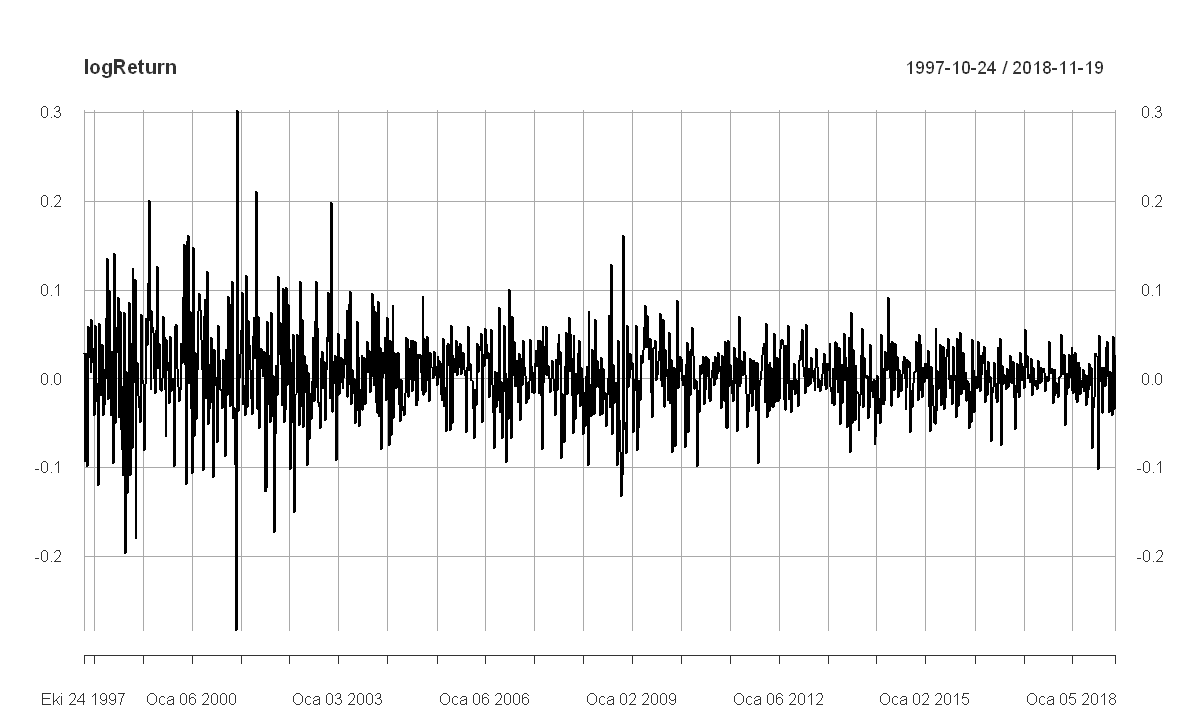

In [4]:
options(repr.plot.width = 10, repr.plot.height = 6)
plot(logReturn)

In [5]:
library(tseries)
adf.test(logReturn)

Warning message:
"package 'tseries' was built under R version 3.5.2"Warning message in adf.test(logReturn):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  logReturn
Dickey-Fuller = -10.247, Lag order = 10, p-value = 0.01
alternative hypothesis: stationary


In [6]:
library(forecast)
full.model <- auto.arima(logReturn)
summary(full.model)

Series: logReturn 
ARIMA(4,1,0) 

Coefficients:
          ar1      ar2      ar3      ar4
      -0.9243  -0.6683  -0.4380  -0.2458
s.e.   0.0293   0.0383   0.0382   0.0294

sigma^2 estimated as 0.00245:  log likelihood=1740.72
AIC=-3471.44   AICc=-3471.38   BIC=-3446.44

Training set error measures:
                       ME       RMSE        MAE MPE MAPE      MASE        ACF1
Training set 2.451569e-05 0.04938345 0.03584259 NaN  Inf 0.7214015 -0.03489773


In [7]:
shapiro.test(full.model$residuals)


	Shapiro-Wilk normality test

data:  full.model$residuals
W = 0.96311, p-value = 4.797e-16


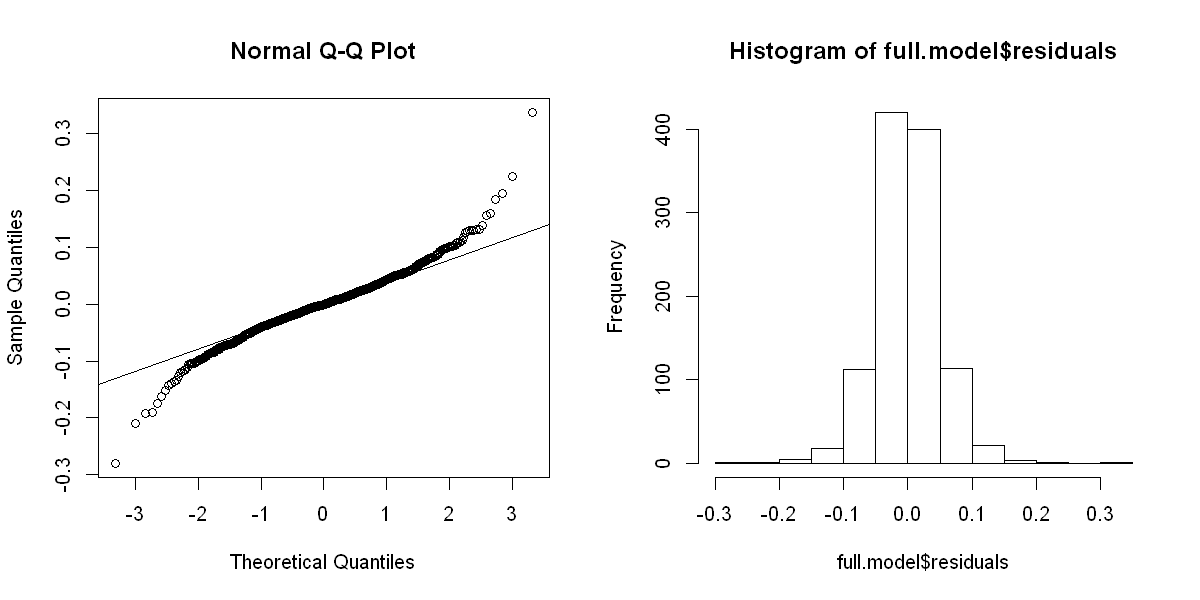

In [8]:
options(repr.plot.height = 5, repr.plot.width = 10)
par(mfrow=c(1,2))
qqnorm(full.model$residuals)
qqline(full.model$residuals)
hist(full.model$residuals)


	Ljung-Box test

data:  Residuals from ARIMA(4,1,0)
Q* = 55.633, df = 6, p-value = 3.453e-10

Model df: 4.   Total lags used: 10



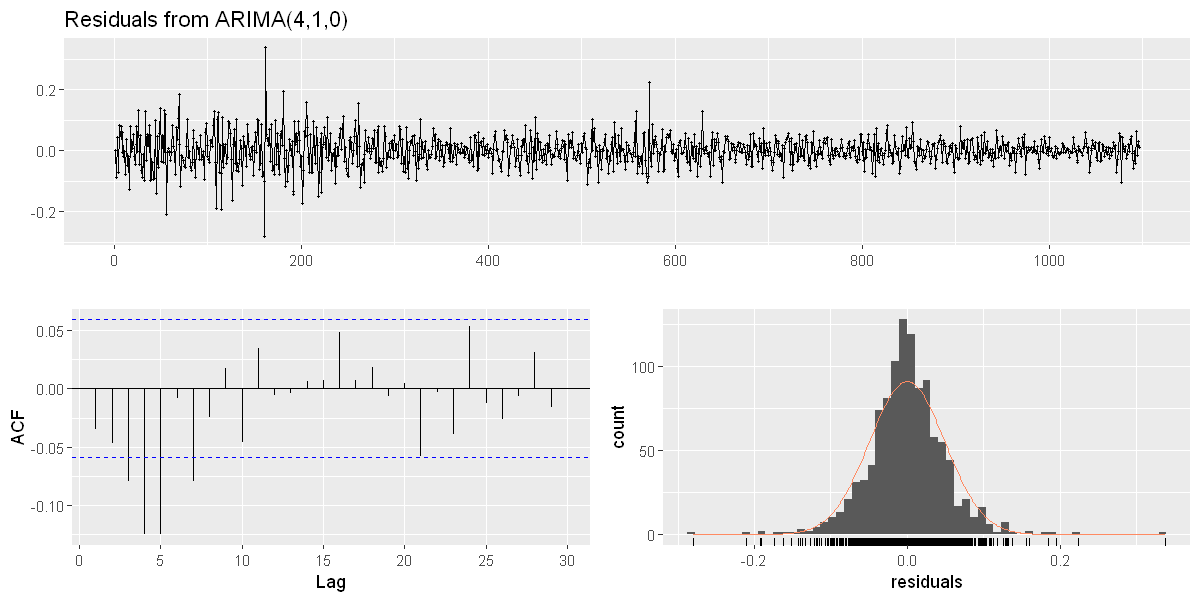

In [9]:
checkresiduals(full.model)

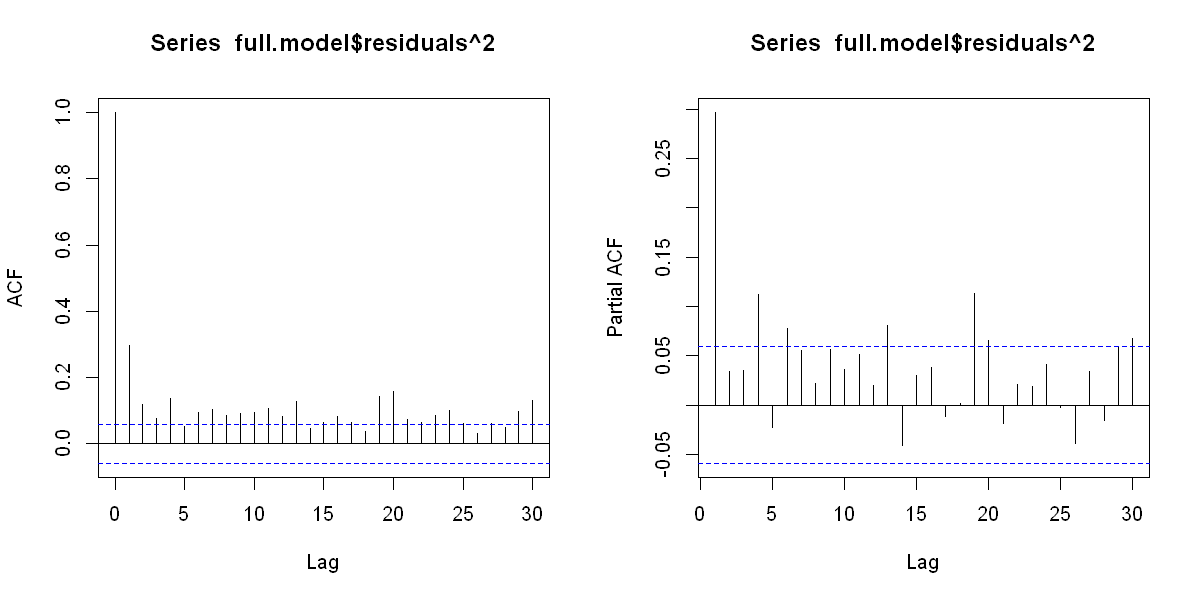

In [10]:
par(mfrow=c(1,2))
acf(full.model$residuals^2)
pacf(full.model$residuals^2)

In [11]:
library(MTS)
archTest(coredata(full.model$residuals))

Warning message:
"package 'MTS' was built under R version 3.5.2"
Attaching package: 'MTS'

The following object is masked from 'package:TTR':

    VMA



Q(m) of squared series(LM test):  
Test statistic:  192.9328  p-value:  0 
Rank-based Test:  
Test statistic:  237.9032  p-value:  0 


In [12]:
library(fGarch)

Warning message:
"package 'fGarch' was built under R version 3.5.2"Loading required package: timeDate
Loading required package: timeSeries
Warning message:
"package 'timeSeries' was built under R version 3.5.2"
Attaching package: 'timeSeries'

The following object is masked from 'package:zoo':

    time<-

Loading required package: fBasics
Warning message:
"package 'fBasics' was built under R version 3.5.2"
Attaching package: 'fBasics'

The following object is masked from 'package:TTR':

    volatility



In [13]:
fit <- garchFit(~garch(1,1), data = full.model$residuals, trace = F)
summary(fit)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = full.model$residuals, 
    trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x000000000d142c00>
 [data = full.model$residuals]

Conditional Distribution:
 norm 

Coefficient(s):
         mu        omega       alpha1        beta1  
-1.9339e-04   1.7529e-05   6.9591e-02   9.2342e-01  

Std. Errors:
 based on Hessian 

Error Analysis:
         Estimate  Std. Error  t value Pr(>|t|)    
mu     -1.934e-04   1.118e-03   -0.173 0.862665    
omega   1.753e-05   1.006e-05    1.742 0.081435 .  
alpha1  6.959e-02   1.956e-02    3.558 0.000373 ***
beta1   9.234e-01   2.114e-02   43.674  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Log Likelihood:
 1880.15    normalized:  1.713901 

Description:
 Tue Mar 05 19:24:43 2019 by user: Ismail 


Standardised Residuals Tests:
                                Statistic p-Value     
 Jarque-Bera Test   R    Chi^2  19.30523  6

### The model confirms that the following parameters alpha1 and beta1 are all significant. The Ljung-box test confirms that the residuals do not have anymore heteroscedasticity because the p-values are very small up to lag 10.

Warning message in plot.window(...):
"   0 * EPS değerlerinin göreceli aralığı küçük (eksen 2)"

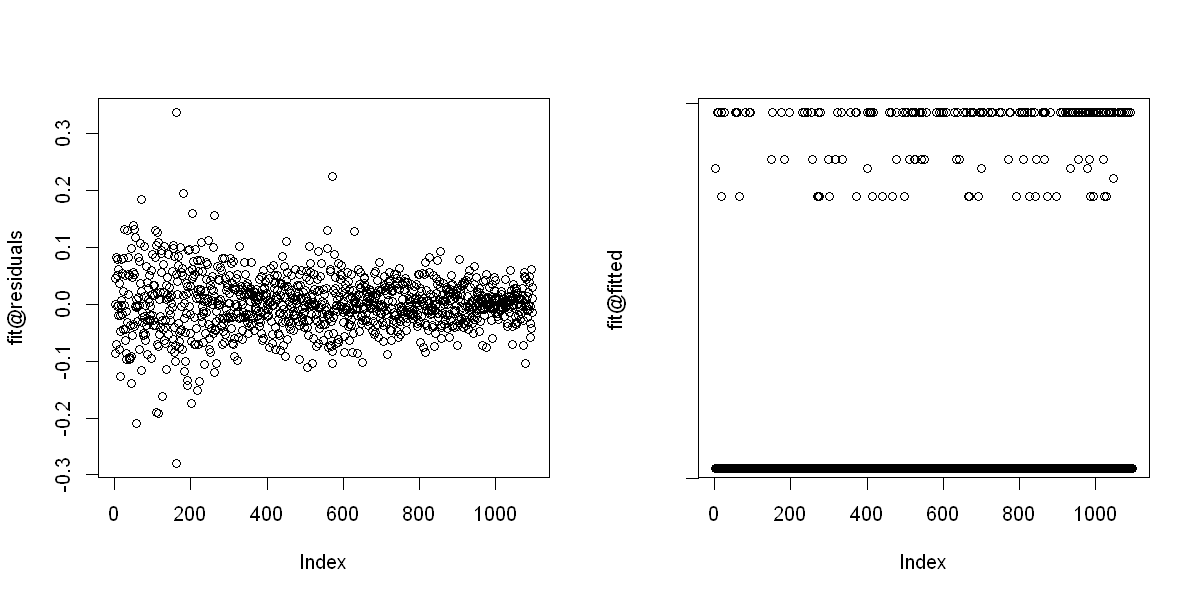

In [17]:
par(mfrow=c(1,2))
plot(fit@residuals)
plot(fit@fitted)